In [2]:
import pandas as pd
from ast import literal_eval
import glob
import numpy as np
import matplotlib.pyplot as plt

In [1]:
### colors from https://learnui.design/tools/data-color-picker.html#palette

WOMEN = "#ff876d"
WOMEN_POS = "#ffcea8"
WOMEN_NEG = "#cb4d36"
MEN = "#009ce4"
MEN_POS = "#76efff"#"#b8e1ff"
MEN_NEG = "#056497"
ACCENT = "#d2518f"
ACCENT2 = "#987ad3"

In [3]:
DELTA = 0.7 ## RECOMMENDED
DELTA2 = 0.7 ## STARTING ATTEMPT
#S = 20*W ## RECOMMENDED

In [4]:
def return_PMI(row):
    fem_PMI = np.log( (row.female) / (P_fem * ((row.female + row.male)/N)))
    mal_PMI = np.log( (row.male) / (P_mal * ((row.female + row.male)/N)))
    return fem_PMI, mal_PMI

In [5]:
def return_cPMI(row): # should P_fem/N and word/W??? Look at more usecases of this in a context.
    fem_cPMI = np.log( row.female/N / (P_fem/N * ((row.female + row.male)/W_adj) + np.sqrt(P_fem) * np.sqrt(np.log(DELTA)/-2)))
    mal_cPMI = np.log( row.male/N / (P_mal/N * ((row.female + row.male)/W_adj) + np.sqrt(P_mal) * np.sqrt(np.log(DELTA)/-2)))
    return fem_cPMI, mal_cPMI

In [6]:
def return_cPMId(row):
    fem_cPMId = np.log( row.female / (Pd_fem * ((row.female + row.male)/D) + np.sqrt(Pd_fem) * np.sqrt(np.log(DELTA)/-2)))
    mal_cPMId = np.log( row.male / (Pd_mal * ((row.female + row.male)/D) + np.sqrt(Pd_mal) * np.sqrt(np.log(DELTA)/-2)))
    return fem_cPMId, mal_cPMId

In [7]:
# dfs = []
# for file in glob.glob("201*.csv"):
#     dfs.append(pd.read_csv(file))
# df = pd.concat(dfs)
# # df.to_csv("all_comments.csv", index=False)

In [ ]:
# Load precompiled dataset (big)
import pandas as pd
df = pd.read_csv("all_comments.csv")

C:\Users\vanki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [23]:
df = pd.read_csv("singles.csv")

C:\Users\vanki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [28]:
df.dropna(subset=['Descriptors_parsed'], inplace=True) # somekind of mistake
df = df[~(df.subreddit.str.startswith("Q")) | ~(df.subreddit.str.startswith("["))]

In [31]:
df['Descriptors_parsed'] = df['Descriptors_parsed'].str.replace("set()", "")

<ipython-input-31-9dbdb7623004>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Descriptors_parsed'] = df['Descriptors_parsed'].str.replace("set()", "")


In [32]:
df['Descriptors_parsed'] = df['Descriptors_parsed'].map(literal_eval)
# # df['Verbs_parsed'] = df['Verbs_parsed'].map(literal_eval)
# df['Descriptors_parsed'] = df['Descriptors_parsed'].map(set)
# df['Verbs_parsed'] = df['Verbs_parsed'].map(set)

In [13]:
#df['single_mention'] = df.groupby('id').transform(lambda group: len(group) == 1) # Figure out how to do this

In [14]:
# singles = df.groupby('id').filter(lambda group: len(group) == 1) # look only at comments that comment on ONE politician -- easier?
# singles.to_csv("singles.csv", index=False)
# df = singles

In [15]:
# df = pd.read_csv("singles.csv")

In [ ]:
# ### if you would like to isolate to just a subset of the data
#full_sg = singles
left = ['Liberal', 'SocialDemocracy', 'socialism', 'alltheleft', 'neoliberal', 'democrats']
right = ['Libertarian', 'Conservative', 'Republican']
alt_right = ['The_Donald']
euro = ['ireland', 'unitedkingdom', 'europe']
non_euro = ['canada', 'uspolitics', 'newzealand', 'australia', 'india']
eng = ['canada', 'uspolitics', 'newzealand', 'australia', 'india', 'ireland', 'unitedkingdom']
non_eng = ['europe']
# df = full_sg[full_sg['subreddit'].isin(non_eng)]
# df.shape

In [17]:
# df=full_sg

NameError: name 'full_sg' is not defined

In [ ]:
fem_freq = {}
mal_freq = {}
for doc in df[df['sex'] == 'female'].Descriptors_parsed:
    for adj in doc: #ensure the same word isn't counted twice
        if adj.lower() in fem_freq.keys():
            fem_freq[adj.lower()] += 1
        else:
            fem_freq[adj.lower()] = 1
            mal_freq[adj.lower()] = 0

for doc in df[df['sex'] == 'male'].Descriptors_parsed:
    for adj in doc: #ensure the same word isn't counted twice
        if adj.lower() in mal_freq.keys():
            mal_freq[adj.lower() ] += 1
        else:
            mal_freq[adj.lower() ] = 1
            fem_freq[adj.lower() ] = 0

In [ ]:
array = pd.DataFrame.from_dict([fem_freq,mal_freq])
array.index = ['female', 'male']

In [ ]:
array_T = array.transpose()
array_T = array_T[(array_T.female > 2) & (array_T.male > 2)] # only look at words that appear at least 3 times in both sample sets.

In [ ]:
W_adj = sum(df.Descriptors_parsed.map(len))

In [ ]:
N =  df.shape[0]
P_fem = df[df['sex'] == 'female'].shape[0]
P_mal = df[df['sex'] == 'male'].shape[0]

In [ ]:
array_T['PMI_female'], array_T['PMI_male'] = zip(*array_T.apply(lambda row: return_PMI(row), axis=1))

In [ ]:
array_T['cPMI_female'], array_T['cPMI_male'] = zip(*array_T.apply(lambda row: return_cPMI(row), axis=1))

In [ ]:
array_T.sort_values(by=['PMI_female'], axis=0, ascending=False).iloc[:300]

In [ ]:
array_T.sort_values(by=['PMI_male'], axis=0, ascending=False).iloc[:300]

In [ ]:
#array_T.sort_values(by=['cPMI_male'], axis=0, ascending=False).iloc[:200]
#(array_T['cPMI_female'] - array_T['cPMI_male']).sort_values(ascending=False).iloc[:200]

In [33]:
df.head()

,id,body,subreddit,to_type,NEL,Names,created_utc,sex,ethnicity,origin,...,nickname_used,Adjectives,Verbs,Nouns,Descriptors_parsed,Verbs_parsed,Relation,Valence,Arousal,Dominance
0,e2r5k8m,This is the FAKEST news! [NAME] is real Americ...,politics,t1,Q22686,['Trump'],NaN,male,NaN,United States of America,...,False,"['real', 'american']",['do'],"['news', 'name', 'hero', 'name']","{hero, real, american, never}","{'be', 'do'}","['nsubj', 'dep']",0.657286,0.493714,0.571571
1,e2r5kpy,Makes me wonder why Cohen was secretly recordi...,politics,t3,Q22686,['Trump'],NaN,male,NaN,United States of America,...,False,"['own', 'many', 'many', 'other', 'many', 'many']","['make', 'wonder', 'record', 'plan', 'gather',...","['conversation', 'blackmail', 'leverage', 'rec...",(),{'involve'},['nsubjpass'],0.661333,0.468905,0.559714
2,e2r5kwn,That's a pretty big gamble to make. I tend to ...,politics,t1,Q7747,['Putin'],NaN,male,Russians,Russia,...,False,"['big', 'international', 'dangerous', 'hard', ...","['make', 'tend', 'agree', 'be', 'do', 'be', 'm...","['gamble', 'thing', 'scale', 'precedent', 'nam...",{other},set(),['pobj'],0.615391,0.488696,0.557217
3,e2r5l1f,Considering [NAME] asked the Democrats to do i...,news,t1,Q22686,['Trump'],NaN,male,NaN,United States of America,...,False,"['much', 'further', 'russian']","['consider', 'ask', 'do', 'consider', 'go']","['name', 'meddling', 'hacking']",(),{'consider'},['pobj'],0.496000,0.482667,0.470667
4,e2r5lpv,we have tape of [NAME] admitting to sexual ass...,news,t1,Q22686,['Trump'],NaN,male,NaN,United States of America,...,False,"['sexual', 'bad', 'fucking', 'more']","['have', 'admit', 'have', 'rape', 'be', 'be', ...","['tape', 'name', 'assault', 'court', 'record',...","{only, -, defense, ex}",{'rape'},"['pobj', 'dep', 'nmod', 'conj']",0.557370,0.529037,0.526185


In [34]:
# entity_level = df.groupby('NEL').agg([{'Descriptors_parsed': list}, 'count'])
# entity_level['Descriptors_parsed'] = entity_level['Descriptors_parsed'].apply(lambda x: [item for sublist in x for item in sublist])
# entity_level['doc_count'] = df.groupby('NEL')

TypeError: unhashable type: 'dict'

In [35]:
df['Descriptors_parsed'] = df['Descriptors_parsed'].map(list)

In [36]:
entity_level = df.groupby('NEL').agg({'Descriptors_parsed': list})
entity_level['Descriptors_parsed'] = entity_level['Descriptors_parsed'].apply(lambda x: [item for sublist in x for item in sublist])
entity_level['Descriptors_parsed'] = entity_level['Descriptors_parsed'].map(set)

In [ ]:
mapper = df[['NEL','sex']].drop_duplicates('NEL').set_index('NEL').to_dict()['sex']
entity_level['sex'] = entity_level.index.map(mapper)

In [37]:
import re, string
punct = string.punctuation
punct = punct.replace('-','')
punct = punct + "\n\t"
pattern = re.compile("\w*[" + re.escape(punct) + "]+\w*")

In [ ]:
d_fem_freq = {}
d_mal_freq = {}
for ent in entity_level[entity_level['sex'] == 'female'].Descriptors_parsed:
    for adj in ent: #ensure the same word isn't counted twice
        if adj.lower() in d_fem_freq.keys():
            d_fem_freq[adj.lower()] += 1
        else:
            if not pattern.match(adj):
                d_fem_freq[adj.lower()] = 1
                d_mal_freq[adj.lower()] = 0

for ent in entity_level[entity_level['sex'] == 'male'].Descriptors_parsed:
    for adj in ent: #ensure the same word isn't counted twice
        if adj.lower() in d_mal_freq.keys():
            d_mal_freq[adj.lower() ] += 1
        else:
            if not pattern.match(adj):
                d_fem_freq[adj.lower()] = 1
                d_mal_freq[adj.lower()] = 0

In [ ]:
D = entity_level.shape[0]
Pd_fem = entity_level[entity_level['sex'] == 'female'].shape[0]
Pd_mal = entity_level[entity_level['sex'] == 'male'].shape[0]

In [ ]:
d_array = pd.DataFrame.from_dict([d_fem_freq,d_mal_freq])
d_array.index = ['female', 'male']
d_array_T = d_array.transpose()
d_array_T = d_array_T[(d_array_T.female > 2) & (d_array_T.male > 2)] # only look at words that appear at least 3 times in both sample sets.

In [ ]:
d_array_T['PMI_female'], d_array_T['PMI_male'] = zip(*d_array_T.apply(lambda row: return_PMI(row), axis=1))

In [ ]:
d_array_T.sort_values(by=['PMI_female'], axis=0, ascending=False).iloc[:100]

In [ ]:
d_array_T.sort_values(by=['PMI_male'], axis=0, ascending=False).iloc[:300]

In [ ]:
most_fem_c = d_array_T.sort_values(by=['PMI_female'], axis=0, ascending=False).iloc[:100]
least_fem_c = d_array_T.sort_values(by=['PMI_male'], axis=0, ascending=False).iloc[:100]

In [ ]:
most_fem_c.to_excel("most_female_gen.xlsx")
least_fem_c.to_excel("most_male_gen.xlsx")

In [ ]:
most_female = array_T.sort_values(by=['PMI_female'], axis=0, ascending=False).iloc[:100]
least_female = array_T.sort_values(by=['PMI_male'], axis=0, ascending=False).iloc[:100]

In [ ]:
for word in most_female.index:
    print(word)

In [ ]:
for word in most_fem_c.index:
    print(word)

In [52]:
for word in least_fem_c.index:
    print(word)

bloke
wanker
prince
lawful
turkish
madman
unchecked
punchable
truck
dickhead
jock
informant
inflation
businessman
sovereign
chode
prick
cure
envoy
testicle
ruler
worm
republic
discovery
douchebag
constitutionalist
urgent
lad
hereby
imperialism
bluster
mafia
can\'t
gatekeeper
kisser
kiddie
sleazeball
errand
undisclosed
chairman
longstanding
shitbird
douche
fanboy
congressman
diddler
excess
utopia
manifestation
federalist
meddling
lowlife
alley
ukraine
chancellor
affect
offshore
wimp
grim
philosophical
henchman
rain
palace
overhaul
crypto
erection
nationalistic
locker
pronouncement
clickbait
domain
sleaze
subway
fella
plausibly
clique
slimeball
fuckhead
secular
criminality
goof
christ
stunned
behest
horde
onwards
priest
jazz
mogul
expendable
monarch
founder
biblical
obedient
usd
soy
passage
metal
ping
asswipe
wingnut
culprit
tightly
cuff
remnant
tycoon
sweating
erect
informative
engine
lieutenant
interior
a.
upstanding
vehicle
arrangement
retreat
toady
monument
visitor
negligence
treache

In [53]:
# # NOW LOOK FOR WORDS SIGNIFICANT IN AN ENTITY'S CORPUS

# ent_level = df.groupby('NEL').agg({'Descriptors_parsed': [list,'count']})
# ent_level.columns = [ str(col[-1]) for col in ent_level.columns]
# ent_level.reset_index(inplace=True)
# ent_level['list'] = ent_level['list'].apply(lambda x: [item for sublist in x for item in sublist])
# ent_level['sex'] = ent_level.index.map(mapper)
# ent_level.set_index('NEL', inplace=True)
# ent_level['sex'] = ent_level.index.map(mapper)

In [54]:
# DELTA2 = 0.1
# ent_level['t'] = np.sqrt(np.log(DELTA2)/(-2*ent_level['count']))

In [55]:
# ent_level[ent_level['t'] > 0]

In [56]:
# d_fem_freq = {}
# d_mal_freq = {}
# for ent in ent_level[ent_level['sex'] == 'female'].Descriptors_parsed:
#     for adj in ent: #ensure the same word isn't counted twice
#         if adj.lower() in d_fem_freq.keys():
#             d_fem_freq[adj.lower()] += 1
#         else:
#             d_fem_freq[adj.lower()] = 1
#             d_mal_freq[adj.lower()] = 0

# for ent in entity_level[entity_level['sex'] == 'male'].Descriptors_parsed:
#     for adj in ent: #ensure the same word isn't counted twice
#         if adj.lower() in d_mal_freq.keys():
#             d_mal_freq[adj.lower() ] += 1
#         else:
#             d_mal_freq[adj.lower() ] = 1
#             d_fem_freq[adj.lower() ] = 0

NameError: name 'ent_level' is not defined

# Super senses

In [95]:
dics = []
for file in glob.glob("adj-supersenses/manual_annotations/*.txt"):
    tag = file[44:-4]
    with open(file) as f:
        l = f.readlines()
        l = [word[:-1] for word in l]
        dics.append(pd.Series({word: tag for word in l}))
supersenses = pd.concat(dics)
supersenses.name = 'Senses'

In [60]:
most_fem_c.merge(supersenses, left_index=True, right_index=True)['Senses'].value_counts()

body             3
behavior         2
miscellaneous    1
perception       1
feeling          1
Name: Senses, dtype: int64

In [61]:
least_fem_c.merge(supersenses, left_index=True, right_index=True)['Senses'].value_counts()

temporal      2
body          1
substance     1
perception    1
Name: Senses, dtype: int64

In [96]:
n_supersenses = pd.concat([pd.DataFrame(supersenses[~supersenses.index.duplicated(False)]),supersenses[supersenses.index.duplicated(False)].reset_index().groupby('index').agg({'Senses':list})])

# NRC Lexica

In [98]:
emotions = pd.read_csv("nrc_lexica/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt",names=["word", "emotion", "association"], sep="\t")

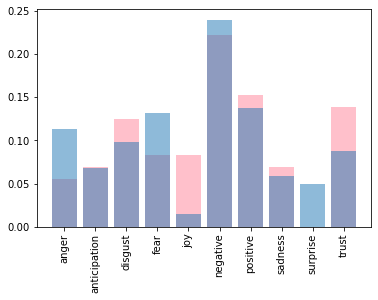

In [64]:
fem_emotions = {}
for word in emotions.emotion.unique():
    fem_emotions[word] = 0
mal_emotions = {}
for word in emotions.emotion.unique():
    mal_emotions[word] = 0
    
for word in most_fem_c.index:
    for emotion in emotions[(emotions['word'] == word) & (emotions['association'] == 1)]['emotion'].tolist():
        fem_emotions[emotion] += 1
for word in least_fem_c.index:
    for emotion in emotions[(emotions['word'] == word) & (emotions['association'] == 1)]['emotion'].tolist():
        mal_emotions[emotion] += 1

male_sum = sum(list(mal_emotions.values()))
fem_sum = sum(list(fem_emotions.values()))

plt.bar(fem_emotions.keys(), np.array(list(fem_emotions.values()))/fem_sum, color='pink')
plt.bar(mal_emotions.keys(), np.array(list(mal_emotions.values()))/male_sum, alpha=0.5)
plt.xticks(rotation=90)
plt.show()

In [65]:
from scipy.stats import chisquare
chisquare(pd.Series(fem_emotions),pd.Series(mal_emotions))

Power_divergenceResult(statistic=97.04950704919649, pvalue=6.208561063534093e-17)

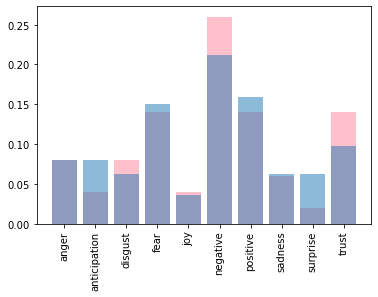

In [66]:
fem_emotions = {}
for word in emotions.emotion.unique():
    fem_emotions[word] = 0
mal_emotions = {}
for word in emotions.emotion.unique():
    mal_emotions[word] = 0
    
for word in most_female.index:
    for emotion in emotions[(emotions['word'] == word) & (emotions['association'] == 1)]['emotion'].tolist():
        fem_emotions[emotion] += 1
for word in least_female.index:
    for emotion in emotions[(emotions['word'] == word) & (emotions['association'] == 1)]['emotion'].tolist():
        mal_emotions[emotion] += 1

male_sum = sum(list(mal_emotions.values()))
fem_sum = sum(list(fem_emotions.values()))

plt.bar(fem_emotions.keys(), np.array(list(fem_emotions.values()))/fem_sum, color='pink')
plt.bar(mal_emotions.keys(), np.array(list(mal_emotions.values()))/male_sum, alpha=0.5)
plt.xticks(rotation=90)
plt.show()

In [99]:
senses = {}
for word in emotions.word.unique():
    senses[word] = emotions[(emotions['word'] == word) & (emotions['association'] == 1)]['emotion'].tolist()

# Profanity

In [100]:
# from here https://github.com/snguyenthanh/better_profanity

with open("profanity_list.txt") as f:
    swears_raw = f.readlines()
    
swears = []
for swear in swears_raw:
    swears.append(swear.strip())
    


In [127]:
most_fem_c['NRC_senses'] = most_fem_c.index.map(senses)
most_fem_c['Supersenses'] = most_fem_c.index.map(n_supersenses['Senses'].to_dict())
most_fem_c['Profanity'] = most_fem_c.index.map(lambda x: 1 if x in swears else 0)

In [128]:
least_fem_c['NRC_senses'] = least_fem_c.index.map(senses)
least_fem_c['Supersenses'] = least_fem_c.index.map(n_supersenses['Senses'].to_dict())
least_fem_c['Profanity'] = least_fem_c.index.map(lambda x: 1 if x in swears else 0)

least_fem_c

,female,male,PMI_female,PMI_male,NRC_senses,Supersenses,Profanity,Slang
bloke,3,79,-1.265809,0.101733,NaN,NaN,0,NaN
wanker,3,69,-1.135756,0.096444,NaN,NaN,1,-1.0
prince,4,82,-1.025755,0.091376,[positive],NaN,0,NaN
lawful,3,60,-1.002225,0.090214,"[positive, trust]",NaN,0,NaN
turkish,3,51,-0.848074,0.081846,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...
sidekick,5,39,-0.132454,0.018376,NaN,NaN,0,NaN
venezuelan,5,39,-0.132454,0.018376,NaN,NaN,0,NaN
hungarian,4,31,-0.126756,0.017643,NaN,NaN,0,NaN
century,12,93,-0.126756,0.017643,[],NaN,0,NaN


In [101]:
slang = pd.read_csv("slangSD.txt",index_col=0,names=["Slang_Score"], sep="\t")
# most_fem_c['Slang'] = most_fem_c.index.map(slang.to_dict()['Slang_Score'])
# least_fem_c['Slang'] = least_fem_c.index.map(slang.to_dict()['Slang_Score'])

In [129]:
least_fem_c['Supersenses'].value_counts()

temporal      2
body          1
perception    1
substance     1
Name: Supersenses, dtype: int64

In [117]:
most_fem_c.iloc[:105].to_excel("Most_Fem_cPMId.xlsx")

In [118]:
least_fem_c.iloc[:105].to_excel("Most_Mal_cPMId.xlsx")

In [ ]:
# Handcoded_Sentiment: An integer referring to the general positivity/negativity of the descriptor.
#     -1 : Negative (e.g. asshole, annoying)
#     0 : Neutral (e.g. watch, person)
#     1 : Positive (e.g. king, genius)

# Handcoded_Senses: Will fit into one of the 8 following themes. Write down one sense for each word on the same row.

# Euphemism - "name calling" or a general metaphor/term applied to someone that cannot neatly fit in the below categories (e.g. bitch, angel)
# Profession - A term related to someone's profession or work activities (e.g. congressman, speaker)
# Ideal - Word relating to a politician's ideals (e.g. republican, antifa)
# Body - Word related to their body (either body part or general attractiveness/sexuality) (e.g. nose, beautiful, sexy)
# Clothing - Word relating to clothing/fashion/attire (e.g. fashionable, suit)
# Attribute - Word related to a politician's supraphysical attributes (descriptors) (e.g. intelligent, thoughtful)
# Family - Word related to a politician's family (e.g. mother) or relations with others (e.g. lover) or (in)capacity for that. (e.g. childless, child-bearing) 
# Other - A word that doesn't fit into any of the above categories (e.g. phone, song)

In [80]:
most_fem = pd.read_csv("most_female_d.csv", index_col=0)
most_mal = pd.read_csv("most_male_d.csv",index_col=0)
most_fem_2 = pd.read_csv("most_female_gen.csv", index_col=0)
most_mal_2 = pd.read_csv("most_male_gen.csv",index_col=0)

In [102]:
most_fem_2['Slang'] = most_fem_2.index.map(slang.to_dict()['Slang_Score'])
most_fem_2['NRC_senses'] = most_fem_2.index.map(senses)
most_fem_2['Supersenses'] = most_fem_2.index.map(n_supersenses['Senses'].to_dict())
most_fem_2['Profanity'] = most_fem_2.index.map(lambda x: 1 if x in swears else 0)

most_mal_2['Slang'] = most_mal_2.index.map(slang.to_dict()['Slang_Score'])
most_mal_2['NRC_senses'] = most_mal_2.index.map(senses)
most_mal_2['Supersenses'] = most_mal_2.index.map(n_supersenses['Senses'].to_dict())
most_mal_2['Profanity'] = most_mal_2.index.map(lambda x: 1 if x in swears else 0)

In [107]:
most_fem_2

,female,male,PMI_female,PMI_male,Senses,Sentiment,Slang,NRC_senses,Supersenses,Profanity
chairwoman,39,11,1.793840,-1.375120,Profession,0.0,NaN,"[positive, trust]",NaN,0
pantsuit,10,3,1.779937,-1.327329,Clothing,0.0,NaN,NaN,NaN,0
matriarch,8,3,1.723848,-1.160275,Family,0.0,NaN,NaN,NaN,0
menopausal,7,3,1.685626,-1.064965,Body,0.0,NaN,NaN,NaN,0
facelift,7,3,1.685626,-1.064965,Attribute,-1.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
catnip,5,5,1.349154,-0.554140,NaN,NaN,NaN,[],NaN,0
flunkie,5,5,1.349154,-0.554140,NaN,NaN,NaN,NaN,NaN,0
chem,5,5,1.349154,-0.554140,NaN,NaN,NaN,NaN,NaN,0
peen,5,5,1.349154,-0.554140,Body,-1.0,NaN,NaN,NaN,0


In [143]:
def remap_nan(value):
    if type(value) == float:
        return value
    if len(value) > 0:
        return value
    else:
        return np.nan
most_mal_2['NRC_senses'].apply(remap_nan).notna().sum()


29

In [142]:
most_fem_2['NRC_senses'].notna().sum()

30

In [144]:
(most_fem_2['Slang'].notna() | most_fem_2['NRC_senses'].apply(remap_nan).notna() | most_fem_2['Supersenses'].notna()).sum()

26

In [145]:
(most_mal_2['Slang'].notna() | most_mal_2['NRC_senses'].apply(remap_nan).notna() |most_mal_2['Supersenses'].notna()).sum()

39

In [149]:
39/(26+39)

0.6

In [113]:
print("Slang", most_fem_2['Slang'].notna().sum() + most_mal_2['Slang'].notna().sum())
print("NRC", most_fem_2['NRC_senses'].notna().sum() +  most_mal_2['NRC_senses'].notna().sum())
print("Supersenses", most_fem_2['Supersenses'].notna().sum() + most_mal_2['Supersenses'].notna().sum())

Slang 23
NRC 84
Supersenses 6


In [115]:
 most_fem_2['NRC_senses'].notna().sum()

30

In [15]:
annot1 = pd.read_excel("Downloads/to_annotates.xlsx", index_col=0)
annot1['Handcoded_Senses'] = annot1['Handcoded_Senses'].str.replace("Euphemism","Label")
annot2 = pd.read_excel("Downloads/AnnotationsForThesis-VB-20210725.xlsx", index_col=0)

In [65]:
annot1['Handcoded_Senses'] = annot1['Handcoded_Senses'].str.replace("Euphemism","Label")
annot1['Handcoded_Senses'] = annot1['Handcoded_Senses'].str.replace("Ideal","Belief")
annot2['Handcoded_Senses'] = annot2['Handcoded_Senses'].str.replace("/Position","")
annot2['Handcoded_Senses'] = annot2['Handcoded_Senses'].str.replace("/Adverb","")

In [24]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(annot1['Handcoded_Sentiment'],annot2['Handcoded_Sentiment'])

0.6183868169991327

In [66]:
cohen_kappa_score(annot1['Handcoded_Senses'].iloc[8:],annot2['Handcoded_Senses'].iloc[8:])

0.620349889402775

In [69]:
senses = annot1['Handcoded_Senses'].to_dict()
senti = annot2['Handcoded_Sentiment'].to_dict()

In [81]:
most_fem['Senses'] = most_fem.index.map(senses)
most_mal['Senses'] = most_mal.index.map(senses)
most_fem['Sentiment'] = most_fem.index.map(senti)
most_mal['Sentiment'] = most_mal.index.map(senti)

most_fem_2['Senses'] = most_fem.index.map(senses)
most_mal_2['Senses'] = most_mal.index.map(senses)
most_fem_2['Sentiment'] = most_fem.index.map(senti)
most_mal_2['Sentiment'] = most_mal.index.map(senti)

In [86]:
print("Women")
print(most_fem_2.Sentiment.value_counts())
print("Men")
print(most_mal_2.Sentiment.value_counts())

Women
-1.0    45
 0.0    38
 1.0     4
Name: Sentiment, dtype: int64
Men
 0.0    52
-1.0    41
 1.0     6
Name: Sentiment, dtype: int64


In [88]:
most_fem_2.Senses.value_counts()

Body          19
Attribute     18
Label         17
Other         13
Clothing       7
Family         6
Profession     4
Belief         3
Name: Senses, dtype: int64

In [89]:
most_mal_2.Senses.value_counts()

Other         41
Label         22
Attribute     13
Profession    12
Belief         8
Body           3
Name: Senses, dtype: int64

In [192]:
pd.concat([most_mal_2.Senses.value_counts(), most_fem_2.Senses.value_counts()], axis=1, keys=['male','female']).fillna(0).to_csv("senses.csv")

In [191]:
pd.concat([most_mal_2.Sentiment.value_counts(), most_fem_2.Sentiment.value_counts()], axis=1, keys=['male','female']).fillna(0).to_csv("senti.csv")

<ipython-input-93-348287759e33>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(cats, rotation=90)
<ipython-input-93-348287759e33>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(cats,rotation=90)


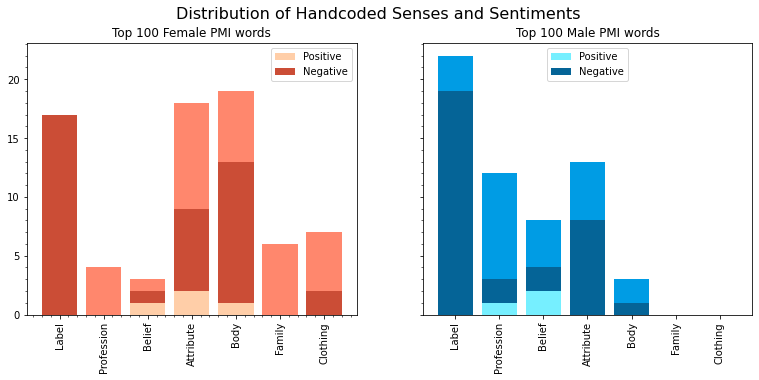

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(13,5), sharey=True)
fig.suptitle("Distribution of Handcoded Senses and Sentiments", size=16)
cats = ['Label','Profession','Belief','Attribute','Body','Family','Clothing']
pos = most_fem_2[most_fem_2['Sentiment'] == 1]['Senses'].value_counts().reindex(cats, fill_value=0)
negs = most_fem_2[most_fem_2['Sentiment'] == -1]['Senses'].value_counts().reindex(cats, fill_value=0)
ax[0].bar(cats, most_fem_2.Senses.value_counts().reindex(cats), color=WOMEN)
ax[0].bar(pos.index,pos, color=WOMEN_POS, label="Positive")
ax[0].bar(negs.index,negs,bottom=pos, color=WOMEN_NEG, label="Negative")
ax[0].set_xticklabels(cats, rotation=90)
ax[0].legend()
ax[0].set_yticks(np.arange(0,27,5))
ax[0].minorticks_on()
ax[0].set_title("Top 100 Female PMI words")


pos_m = most_mal_2[most_mal_2['Sentiment'] == 1]['Senses'].value_counts().reindex(cats, fill_value=0)
negs_m = most_mal_2[most_mal_2['Sentiment'] == -1]['Senses'].value_counts().reindex(cats, fill_value=0)
ax[1].bar(cats, most_mal_2.Senses.value_counts().reindex(cats), color=MEN)
ax[1].bar(pos_m.index,pos_m, color=MEN_POS, label="Positive")
ax[1].bar(negs_m.index,negs_m,bottom=pos_m, color=MEN_NEG, label="Negative")
ax[1].set_xticklabels(cats,rotation=90)
ax[1].legend()
ax[1].set_title("Top 100 Male PMI words")

plt.show()

In [160]:
from scipy.stats import fisher_exact
fisher_exact(np.array((most_fem_2.Senses.value_counts().reindex(cats).values,most_mal_2.Senses.value_counts().reindex(cats).fillna(0).values)))

ValueError: The input `table` must be of shape (2, 2).

In [201]:
fms = pd.concat(fm_cts, keys=["left", "right", "alt_right"], axis=1)
mls = pd.concat(ml_cts, keys=["left", "right", "alt_right"], axis=1)

In [203]:
pd.concat([fms,mls], keys=['female','male'], axis=1).fillna(0).to_csv("senses_cross.csv")

left
Male Profanity  Senses    
0          Other         19
           Profession    13
           Attribute      7
           Belief         4
           Label          3
           Family         2
1          Label          2
dtype: int64
Female Profanity  Senses    
0          Other         23
           Attribute     14
           Label          5
           Family         3
           Body           2
           Profession     2
           Belief         1
dtype: int64

right
Male Profanity  Senses    
0          Other         28
           Label          8
           Profession     5
           Attribute      3
           Belief         3
           Clothing       1
           Family         1
1          Label          1
dtype: int64
Female Profanity  Senses    
0          Other         22
           Attribute     13
           Body           4
           Label          3
           Profession     3
1          Body           2
0          Atr            1
           Belief        

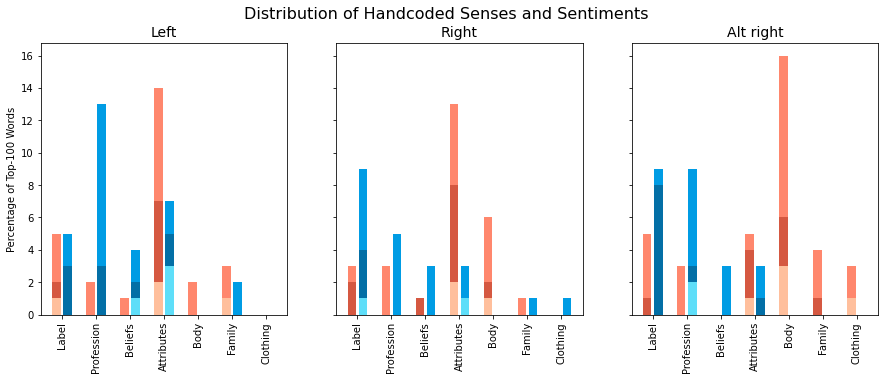

In [177]:
path = "results/PMI/cross/"
groups = ["Left", "Right", "Alt right"]
width = 0.25
distance= 0.33
a=0.8
new_cats  = ['Label','Profession','Beliefs','Attributes','Body','Family','Clothing']

fig,ax = plt.subplots(1,3,figsize=(15,5), sharey=True)
fig.suptitle("Distribution of Handcoded Senses and Sentiments", size=16)
for i,group in enumerate(['left', 'right', 'alt_right']):
    most_fem = pd.read_csv(path + f"most_female_{group}.csv", index_col=0)
    most_mal = pd.read_csv(path + f"most_male_{group}.csv", index_col=0)
    most_fem['Profanity'] = most_fem.index.map(lambda x: 1 if x in swears else 0)
    most_mal['Profanity'] = most_mal.index.map(lambda x: 1 if x in swears else 0)
    print(group)
    print("Male", most_mal[['Profanity','Senses']].value_counts())
    print("Female", most_fem[['Profanity','Senses']].value_counts())
    print("")
    pos = most_fem[most_fem['Sentiment'] == 1]['Senses'].value_counts().reindex(cats, fill_value=0)
    negs = most_fem[most_fem['Sentiment'] == -1]['Senses'].value_counts().reindex(cats, fill_value=0)
    pos_m = most_mal[most_mal['Sentiment'] == 1]['Senses'].value_counts().reindex(cats, fill_value=0)
    negs_m = most_mal[most_mal['Sentiment'] == -1]['Senses'].value_counts().reindex(cats, fill_value=0)
    ax[i].set_title(groups[i],size=14)

    #Base
    ax[i].bar(np.arange(len(cats)), most_fem.Senses.value_counts().reindex(cats), width=width, color=WOMEN, label="Top 100\nFemale PMI Words")
    ax[i].bar(np.arange(len(cats))+distance, most_mal.Senses.value_counts().reindex(cats), width=width, color=MEN, label="Top 100\nMale PMI Words")

    # Women
    ax[i].bar(np.arange(len(cats)),pos, width=width,color=WOMEN_POS, alpha=a, label="Positive")
    ax[i].bar(np.arange(len(cats)),negs,bottom=pos, width=width,color=WOMEN_NEG, alpha=a, label="Negative")

    # Men
    ax[i].bar(np.arange(len(cats))+distance,pos_m, width=width,alpha=a, color=MEN_POS)
    ax[i].bar(np.arange(len(cats))+distance,negs_m,bottom=pos_m, alpha=a, width=width,color=MEN_NEG)
    #legend=plt.legend(facecolor='lightgrey', borderpad=0.5)
    ax[i].set_xticks(np.arange(len(cats))+(distance/2))
    ax[i].set_xticklabels(labels=new_cats,rotation=90)

ax[0].set_ylabel("Percentage of Top-100 Words")
plt.savefig("PMI_cross_results.png",bbox_inches='tight')
plt.show()

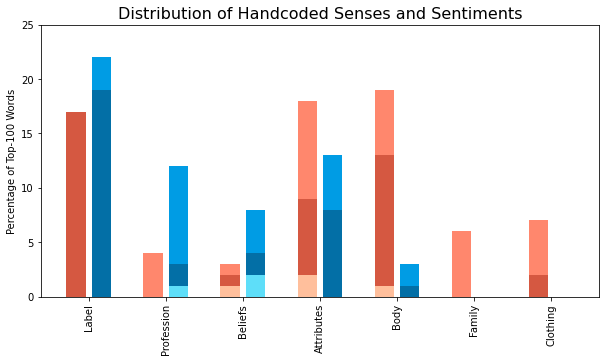

In [131]:
plt.figure(figsize=(10,5))
plt.title("Distribution of Handcoded Senses and Sentiments", size=16)
pos = most_fem_2[most_fem_2['Sentiment'] == 1]['Senses'].value_counts().reindex(cats, fill_value=0)
negs = most_fem_2[most_fem_2['Sentiment'] == -1]['Senses'].value_counts().reindex(cats, fill_value=0)
pos_m = most_mal_2[most_mal_2['Sentiment'] == 1]['Senses'].value_counts().reindex(cats, fill_value=0)
negs_m = most_mal_2[most_mal_2['Sentiment'] == -1]['Senses'].value_counts().reindex(cats, fill_value=0)

width = 0.25
distance= 0.33
a=0.8

#Base
plt.bar(np.arange(len(cats)), most_fem_2.Senses.value_counts().reindex(cats), width=width, color=WOMEN, label="Top 100\nFemale PMI Words")
plt.bar(np.arange(len(cats))+distance, most_mal_2.Senses.value_counts().reindex(cats), width=width, color=MEN, label="Top 100\nMale PMI Words")

# Women
plt.bar(np.arange(len(cats)),pos, width=width,color=WOMEN_POS, alpha=a, label="Positive")
plt.bar(np.arange(len(cats)),negs,bottom=pos, width=width,color=WOMEN_NEG, alpha=a, label="Negative")

# Men
plt.bar(np.arange(len(cats))+distance,pos_m, width=width,alpha=a, color=MEN_POS)
plt.bar(np.arange(len(cats))+distance,negs_m,bottom=pos_m, alpha=a, width=width,color=MEN_NEG)
new_cats  = ['Label','Profession','Beliefs','Attributes','Body','Family','Clothing']
#legend=plt.legend(facecolor='lightgrey', borderpad=0.5)
plt.xticks(ticks=np.arange(len(cats))+(distance/2), labels=new_cats,rotation=90)
plt.yticks(np.arange(0,27,5))
plt.ylabel("Percentage of Top-100 Words")
plt.savefig("PMI_results.png",bbox_inches='tight')
plt.show()

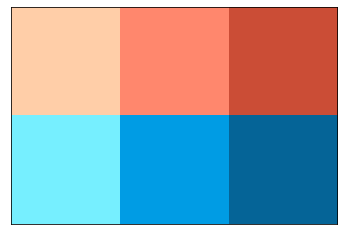

In [128]:
import matplotlib as mpl
A = np.arange(6)
B = np.reshape(A, (2, -1))
cmap = mpl.colors.ListedColormap([WOMEN_POS, WOMEN, WOMEN_NEG, MEN_POS, MEN, MEN_NEG], name='colors', N=None)
plt.xticks([])
plt.yticks([])
plt.imshow(B, cmap=cmap)


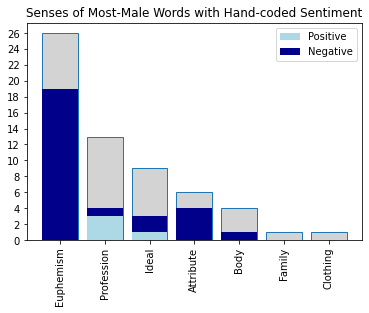

In [192]:
cats = ['Euphemism','Profession','Ideal','Attribute','Body','Family','Clothing']
pos_m = most_mal_HC[most_mal_HC['Handcoded_Sentiment'] == 1]['Handcoded_Sense'].value_counts().reindex(cats, fill_value=0)
negs_m = most_mal_HC[most_mal_HC['Handcoded_Sentiment'] == -1]['Handcoded_Sense'].value_counts().reindex(cats, fill_value=0)
plt.bar(cats, most_mal_HC.Handcoded_Sense.value_counts().reindex(cats), color='lightgrey', edgecolor='C0')
plt.bar(pos_m.index,pos_m, color='lightblue', label="Positive")
plt.bar(negs_m.index,negs_m,bottom=pos_m, color='darkblue', label="Negative")
plt.xticks(rotation=90)
plt.legend()
plt.yticks(np.arange(0,most_mal_HC.Handcoded_Sense.value_counts().max()+1,2))
plt.title("Senses of Most-Male Words with Hand-coded Sentiment")
plt.show()

In [3]:
# Odds ratios
import pandas as pd

cts = pd.read_csv("senses.csv", index_col=0)
cts

,male,female
Other,41.0,13
Label,22.0,17
Attribute,13.0,18
Profession,12.0,4
Belief,8.0,3
Body,3.0,19
Clothing,0.0,7
Family,0.0,6


In [18]:
most_fem_2['Senses'] = most_fem_2.index.map(senses)
most_mal_2['Senses'] = most_mal_2.index.map(senses)
most_fem_2['Sentis'] = most_fem_2.index.map(senti)
most_mal_2['Sentis'] = most_mal_2.index.map(senti)

In [12]:
annot1 = pd.read_excel("Downloads/to_annotates.xlsx", index_col=0)
annot1['Handcoded_Senses'] = annot1['Handcoded_Senses'].str.replace("Euphemism","Label")
annot2 = pd.read_excel("Downloads/AnnotationsForThesis-VB-20210725.xlsx", index_col=0)
annot1['Handcoded_Senses'] = annot1['Handcoded_Senses'].str.replace("Euphemism","Label")
annot1['Handcoded_Senses'] = annot1['Handcoded_Senses'].str.replace("Ideal","Belief")
annot2['Handcoded_Senses'] = annot2['Handcoded_Senses'].str.replace("/Position","")
annot2['Handcoded_Senses'] = annot2['Handcoded_Senses'].str.replace("/Adverb","")
senses = annot1['Handcoded_Senses'].to_dict()
senti = annot2['Handcoded_Sentiment'].to_dict()

In [15]:
most_fem_2 = pd.read_csv("results/PMI/most_female_d.csv", index_col=0)
most_mal_2 = pd.read_csv("results/PMI/most_male_d.csv",index_col=0)

In [40]:
a= most_mal_2[(most_mal_2['Senses'] == 'Label') & (most_mal_2['Sentis'] == -1.0)].shape[0]
d= most_fem_2[~(most_fem_2['Senses'] == 'Label') & (most_fem_2['Sentis'] == -1.0)].shape[0]
b= most_fem_2[(most_fem_2['Senses'] == 'Label') & (most_fem_2['Sentis'] == -1.0)].shape[0]
c = most_mal_2[~(most_mal_2['Senses'] == 'Label') & (most_mal_2['Sentis'] == -1.0)].shape[0] 
print(a,b,c,d)
#ci = exp(log(or) ± Zα/2*√1/a + 1/b + 1/c + 1/d), where Zα/2 is the critical value of the Normal distribution at α/2 (e.g. for a confidence level of 95%, α is 0.05 and the critical value is 1.96).where Zα/2 is the critical value of the Normal distribution at α/2 (e.g. for a confidence level of 95%, α is 0.05 and the critical value is 1.96).

19 17 22 28


In [43]:
ccts = pd.read_csv("senses_cross.csv", index_col=0, header=[0,1])
ccts

female                  male                
             left right alt_right  left right alt_right
Other        23.0  22.0      14.0  19.0  28.0      26.0
Attribute    14.0  14.0       5.0   7.0   3.0       3.0
Label         5.0   3.0       5.0   5.0   9.0       9.0
Family        3.0   1.0       4.0   2.0   1.0       0.0
Body          2.0   6.0      16.0   0.0   0.0       0.0
Profession    2.0   3.0       3.0  13.0   5.0       9.0
Belief        1.0   1.0       0.0   4.0   3.0       3.0
Clothing      0.0   0.0       3.0   0.0   1.0       0.0

In [51]:
ccts.index

female                  male                
             left right alt_right  left right alt_right
Other        23.0  22.0      14.0  19.0  28.0      26.0
Attribute    14.0  14.0       5.0   7.0   3.0       3.0
Label         5.0   3.0       5.0   5.0   9.0       9.0
Family        3.0   1.0       4.0   2.0   1.0       0.0
Body          2.0   6.0      16.0   0.0   0.0       0.0
Profession    2.0   3.0       3.0  13.0   5.0       9.0
Belief        1.0   1.0       0.0   4.0   3.0       3.0
Clothing      0.0   0.0       3.0   0.0   1.0       0.0

In [59]:
 ccts['male']['left'].loc[['Profession', 'Belief']].sum()

17.0

In [80]:
group = 'left'

a = ccts['female'][group].loc[['Attribute']].sum()
d = ccts['male'][group].loc[['Other', 'Body', 'Label', 'Family', 'Profession', 'Belief',
       'Clothing']].sum()
b = ccts['male'][group].loc[['Attribute']].sum()
c= ccts['female'][group].loc[['Other', 'Body', 'Label', 'Family', 'Profession', 'Belief',
       'Clothing']].sum()
print(a,b,c,d)

14.0 7.0 36.0 43.0


In [85]:
a = ccts['female']['right'].loc[['Attribute']].sum()
d = ccts['female']['alt_right'].loc[['Other', 'Body', 'Label', 'Family','Profession', 'Belief',
       'Clothing']].sum()
b = ccts['female']['alt_right'].loc[['Attribute']].sum()
c= ccts['female']['right'].loc[['Other', 'Body', 'Label', 'Family', 'Profession', 'Belief',
       'Clothing']].sum()
print(a,b,c,d)

14.0 5.0 36.0 45.0


In [74]:
a = ccts['female']['alt_right'].loc[['Body']].sum()
d = ccts['male']['right'].loc[['Other', 'Attribute', 'Label', 'Family','Profession', 'Belief',
       'Clothing']].sum()
c = ccts['female']['right'].loc[['Body']].sum()
b= ccts['male']['alt_right'].loc[['Other', 'Attribute', 'Label', 'Family', 'Profession', 'Belief',
       'Clothing']].sum()
print(a,b,c,d)

16.0 50.0 6.0 50.0


In [64]:
a = ccts['male']['alt_right'].loc[['Profession', 'Belief']].sum()
d = ccts['female']['alt_right'].loc[['Other', 'Attribute', 'Label', 'Family', 'Body',
       'Clothing']].sum()
c = ccts['female']['alt_right'].loc[['Profession', 'Belief']].sum()
b= ccts['male']['alt_right'].loc[['Other', 'Attribute', 'Label', 'Family', 'Body',
       'Clothing']].sum()
print(a,b,c,d)

12.0 38.0 3.0 47.0


# Name use

In [41]:
def to_bool(value):
    try:
        return literal_eval(value)
    except ValueError:
        return value

df['family_name_used'] = df['family_name_used'].map(to_bool)
df['nickname_used'] = df['nickname_used'].map(to_bool)
df['full_name_used'] = df['full_name_used'].map(to_bool)

In [46]:
from scipy.stats import chi2_contingency

(5353505.2200133195,
 0.9999991199557648,
 5369151,
 array([[0.21579479, 0.2473    , 0.13145582, 0.4054494 ],
        [0.21579479, 0.2473    , 0.13145582, 0.4054494 ],
        [0.21579479, 0.2473    , 0.13145582, 0.4054494 ],
        ...,
        [0.21579479, 0.2473    , 0.13145582, 0.4054494 ],
        [0.21579479, 0.2473    , 0.13145582, 0.4054494 ],
        [0.21579479, 0.2473    , 0.13145582, 0.4054494 ]]))

In [81]:
fem = df[df['sex'] == 'female'][['family_name_used', 'given_name_used', 'nickname_used', 'full_name_used']].sum(axis=0)
men = df[df['sex'] == 'male'][['family_name_used', 'given_name_used', 'nickname_used', 'full_name_used']].sum(axis=0)


KeyboardInterrupt: 

In [71]:
chi2_contingency(np.array([fem.values, men.values]))

(2614058.473977163,
 0.0,
 3,
 array([[1143129.6250698 ,   91943.00714317,  219928.93457171,
          361015.43321531],
        [7614170.3749302 ,  612414.99285683, 1464905.06542829,
         2404655.56678469]]))

In [82]:
ms = df[df['sex'] == 'male'][['family_name_used', 'given_name_used', 'full_name_used', 'nickname_used']].mean()
fs = df[df['sex'] == 'female'][['family_name_used', 'given_name_used', 'full_name_used', 'nickname_used']].mean()

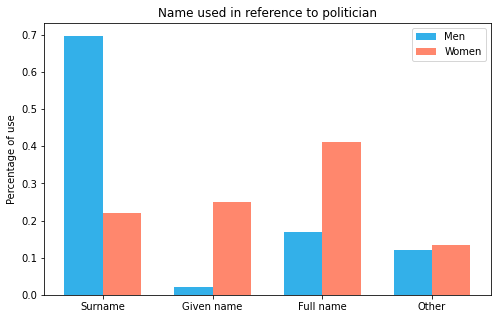

In [83]:
N = 4
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, ms, width, color=MEN, label='Men', alpha=0.8)
rects2 = ax.bar(ind+width, fs, width, color=WOMEN, label='Women')

distance = 0.25
dub_w = 0.16

# for i in range(N):
#     plt.axhline(y=E_avgs[0][i], xmin=i*distance+0.045, xmax=(i*distance+0.045)+dub_w, color='red')

# plt.axhline(y=0, xmin=0, xmax=0, color='red', label="Expected")
# add some
ax.set_ylabel('Percentage of use')
ax.set_title('Name used in reference to politician')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('Surname', 'Given name', 'Full name', 'Other') )

ax.legend()
plt.savefig("Nameuse2.png")
plt.show()

# CDF plot

In [79]:
import matplotlib.pyplot as plt
import numpy as np
fems = df[df['sex'] == 'female']
mens = df[df['sex'] == 'male']
men_ct = mens.groupby('NEL').count()['body']
fem_ct = fems.groupby('NEL').count()['body']

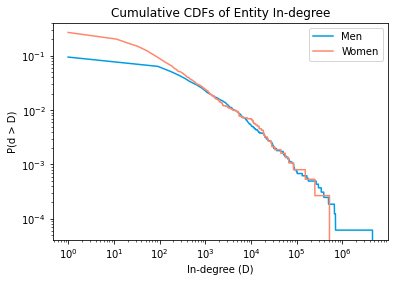

In [80]:
values, base = np.histogram(men_ct, bins=50000)
cumulative = np.cumsum(values)/values.sum()
### plot the cumulative function
plt.plot(base[:-1], 1-cumulative, c=MEN, label="Men")
values, base = np.histogram(fem_ct, bins=50000)
cumulative = np.cumsum(values)/values.sum()
## plot the cumulative function
plt.plot(base[:-1], 1-cumulative, c=WOMEN, label= "Women")
plt.xlabel("In-degree (D)")
plt.title("Cumulative CDFs of Entity In-degree")
plt.ylabel("P(d > D)")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.savefig("CDFs.png")
plt.show()

In [ ]:
from scipy.stats import mannwhitneyu, ks_2samp

print(mannwhitneyu(men_ct, fem_ct, alternative='two-sided'))
print(ks_2samp(men_ct, fem_ct))

# Network Analysis

In [3]:
multi = df.groupby('id').filter(lambda group: len(group) > 1)

In [4]:
multi.sex.value_counts()

male                  4815262
female                 809175
transgender female         71
genderfluid                51
Name: sex, dtype: int64

In [263]:
print("Total unique comments", len(multi['id'].unique()))
print("Total DF size", multi.shape[0])

Total unique comments 2317117
Total DF size 5624559


In [5]:
import pandas as pd
from ast import literal_eval
import glob
import numpy as np
from scipy.stats import ttest_ind

def assortivity(G1, G2, multi):
    # assumes how many men/women are mentioned matters!
    #multi = df.groupby('id').filter(lambda group: len(group) > 1)
    g1_ids = multi[multi['sex'] == G1]['id']
    from_g1 = multi[multi['id'].isin(set(g1_ids))]
    P_g2_fromg1 = from_g1[from_g1['sex'] == G2].shape[0]/ len(g1_ids) ## should this be a set or not?
    return(P_g2_fromg1)

def cis_assortivity(G, multi):
    # Assumes the NUMBER of connections for each ID doesn't matter
    g_ids = set(multi[multi['sex'] == G]['id'])
    ## see where 'female' in value counts is > 2
    subset = multi.groupby(['id','sex'])['NEL'].count().unstack()
    P_fromgtog = (subset[subset[G] > 1.0][G].sum() - subset[subset[G] > 1.0][G].shape[0])/ len(g_ids)
    #P_g = subset[subset[G] > 0.0].shape[0]/ len(set(multi['id']))
    #print(P_fromgtog, P_g)
    return P_fromgtog

In [265]:
print('Male to female', assortivity('male','female', multi))
print('Female to male', assortivity('female','male', multi))
print('Female to female', cis_assortivity('female',multi))
print('Male to male', cis_assortivity('male',multi))

Male to female 0.1543432112312892
Female to male 1.3752525720641393
Female to female 0.1441129104094586
Male to male 1.1069354879642117


In [6]:
mf_rec = assortivity('male','female', multi)
fm_rec = assortivity('female','male', multi)
mm_rec = cis_assortivity('male', multi)
ff_rec = cis_assortivity('female', multi)

In [7]:
import matplotlib.pyplot as plt
with open("male_male.txt", "r+") as file:
    raw_mm = file.readlines()
    mm = [float(x[:-2]) for x in raw_mm]
    
with open("female_male.txt", "r+") as file:
    raw_fm = file.readlines()
    fm = [float(x[:-2]) for x in raw_fm]

with open("male_female.txt", "r+") as file:
    raw_mf = file.readlines()
    mf = [float(x[:-2]) for x in raw_mf]

with open("female_female.txt", "r+") as file:
    raw_ff = file.readlines()
    ff = [float(x[:-2]) for x in raw_ff]

In [8]:
def get_pvalue(obs,x,p, ascending=True):
    for i, value in enumerate(x):
        if value > obs:
            return p[i-1]

female to female 7.432768389358894e-66
male to female 2.420486330769877e-126
female to male 2.2554098840664257e-30
male to male 2.8979930055486007e-179


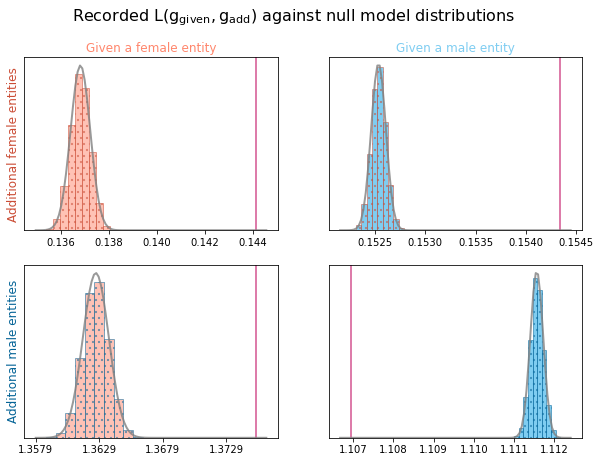

In [76]:
fig, ax = plt.subplots(2,2, figsize=(10,7))
fig.suptitle("Recorded $\mathregular{L(g_{given},g_{add})}$ against null model distributions", size=16)

#ax[0][0].title("Women, given woman-containing")
mu, std = norm.fit(ff)
ax[0][0].hist(ff, alpha=0.5,density=True, color=WOMEN, hatch='..', edgecolor=WOMEN_NEG, fill=True)
ax[0][0].axvline(ff_rec, color=ACCENT)
# Plot the PDF.
xmin, xmax = ax[0][0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax[0][0].set_yticks([])
ax[0][0].set_ylabel("Additional female entities", size=12, color=WOMEN_NEG)
ax[0][0].set_title("Given a female entity", size=12, color=WOMEN)
ax[0][0].plot(x, p, 'grey', linewidth=2, alpha=0.8)
print("female to female", get_pvalue(ff_rec,x,p))

mu, std = norm.fit(mf)
ax[0][1].hist(mf, alpha=0.5,density=True, color=MEN, edgecolor=WOMEN_NEG, hatch='..')
ax[0][1].axvline(mf_rec, color=ACCENT)
# Plot the PDF.
xmin, xmax = ax[0][1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax[0][1].set_yticks([])
ax[0][1].set_title("Given a male entity", size=12,color=MEN, alpha=0.5)
ax[0][1].plot(x, p, 'grey', linewidth=2, alpha=0.8)
print("male to female" ,get_pvalue(mf_rec,x,p))

mu, std = norm.fit(fm)
ax[1][0].hist(fm, alpha=0.5,density=True, color=WOMEN, edgecolor=MEN_NEG, hatch='..')
ax[1][0].axvline(fm_rec, color=ACCENT)
# Plot the PDF.
xmin, xmax = ax[1][0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax[1][0].set_xticks(np.arange(xmin,xmax,0.005))
ax[1][0].set_yticks([])
ax[1][0].set_ylabel("Additional male entities", size=12, color=MEN_NEG)
ax[1][0].plot(x, p, 'grey', linewidth=2, alpha=0.8)
print("female to male" , get_pvalue(fm_rec,x,p))

mu, std = norm.fit(mm)
ax[1][1].hist(mm, alpha=0.5,density=True, color=MEN, edgecolor=MEN_NEG, hatch='..')
ax[1][1].axvline(mm_rec, color=ACCENT)
# Plot the PDF.
xmin, xmax = ax[1][1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax[1][1].set_yticks([])
ax[1][1].plot(x, p, 'grey', linewidth=2, alpha=0.8)
print("male to male" , get_pvalue(mm_rec,x,p))


# plt.axvline(cis_assortivity('female',multi[multi['subreddit'].isin(left)]), color='blue', label="Left")
# plt.axvline(cis_assortivity('female',multi[multi['subreddit'].isin(right)]), color='red', label="Right")
# plt.axvline(cis_assortivity('female',multi[multi['subreddit'].isin(alt_right)]), color='orange', label="Alt-right")
plt.savefig("null_models.png")
plt.show()

In [90]:
left = ['Liberal', 'SocialDemocracy', 'socialism', 'alltheleft', 'neoliberal', 'democrats']
right = ['Libertarian', 'Conservative', 'Republican']
alt_right = ['The_Donald']
maps = {}
for sr in left:
    maps[sr] = 'left'
for sr in right:
    maps[sr] = 'right'
maps['The_Donald'] = 'alt_right'
df['group'] = df['subreddit'].map(maps)
df['group'].fillna('non-political')
df[['id','sex','group','Valence','Dominance','Arousal']][df['sex'].isin(['male','female'])].groupby('id').filter(lambda group: len(group) == 1).to_csv("sg_r.csv")

In [179]:
df.shape

NameError: name 'df' is not defined